In [10]:
%pylab nbagg
%load_ext autoreload
%autoreload 2
import mpl_interactions as pli

[2023-11-10 15:24:11,698] {pyplot.py:414} DEBUG - Loaded backend nbAgg version unknown.
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['det']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [8]:
# Test the fastcat mhd file reader from fastcat.utils
import fastcat as fc
import numpy as np
import matplotlib.pyplot as plt
import fastcat.ggems_scatter as gg_scatter


# Read the mhd file from data
mhd_file      = '/home/jericho/1-Workspace/fastcat_gate/Catphan604.mhd'
range_file    = '/home/jericho/1-Workspace/fastcat_gate/Catphan604_Range.txt'
material_file = '/home/jericho/1-Workspace/fastcat_gate/Materials.txt'
spectrum_file = '/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/data/spectrum_120kVp_2mmAl.dat'

Catphan604_phantom = fc.utils.get_phantom_from_mhd(mhd_file,range_file,material_file)

# import mpl_interactions as pli
s = fc.Spectrum()
s.load(spectrum_file=spectrum_file)
det = fc.Detector(s,'CsI-784-micrometer')
angles = np.linspace(0,np.pi*2,10,endpoint=False)        

[2023-11-10 09:42:06,884] {utils.py:231} INFO - Loading density data from file
[2023-11-10 09:42:06,887] {utils.py:321} INFO -     Saved Air atten to file in data/mu/Air.csv
[2023-11-10 09:42:06,889] {utils.py:321} INFO -     Saved polyurethane atten to file in data/mu/polyurethane.csv
[2023-11-10 09:42:06,890] {utils.py:321} INFO -     Saved teflon atten to file in data/mu/teflon.csv
[2023-11-10 09:42:06,891] {utils.py:321} INFO -     Saved pmp atten to file in data/mu/pmp.csv
[2023-11-10 09:42:06,893] {utils.py:321} INFO -     Saved bone50 atten to file in data/mu/bone50.csv
[2023-11-10 09:42:06,894] {utils.py:321} INFO -     Saved ldpe atten to file in data/mu/ldpe.csv
[2023-11-10 09:42:06,895] {utils.py:321} INFO -     Saved polystyrene atten to file in data/mu/polystyrene.csv
[2023-11-10 09:42:06,896] {utils.py:321} INFO -     Saved acrylic atten to file in data/mu/acrylic.csv
[2023-11-10 09:42:06,898] {utils.py:321} INFO -     Saved bone20 atten to file in data/mu/bone20.csv
[202

In [9]:
Catphan604_phantom.return_projs(det,s,angles, 
                                mgy=0, ASG=False,scat_on=False,
                                det_on=False,bowtie=False,
                                filter='bowtie_real',return_intensity=True)

[2023-11-10 09:42:09,787] {simulate.py:221} INFO - Initializing filter bowtie_real
[2023-11-10 09:42:09,807] {simulate.py:476} INFO -     Interp scatter 512 to 512 pixels
[2023-11-10 09:42:09,807] {simulate.py:476} INFO -     Interp scatter 512 to 512 pixels
[2023-11-10 09:42:10,547] {simulate.py:579} INFO - Running Simulations
[2023-11-10 09:42:10,547] {simulate.py:606} INFO -     Simulating 10 keV
[2023-11-10 09:42:11,231] {simulate.py:606} INFO -     Simulating 20 keV
[2023-11-10 09:42:11,858] {simulate.py:606} INFO -     Simulating 30 keV
[2023-11-10 09:42:12,461] {simulate.py:606} INFO -     Simulating 40 keV
[2023-11-10 09:42:13,057] {simulate.py:606} INFO -     Simulating 50 keV
[2023-11-10 09:42:13,646] {simulate.py:606} INFO -     Simulating 60 keV
[2023-11-10 09:42:14,254] {simulate.py:606} INFO -     Simulating 70 keV
[2023-11-10 09:42:14,895] {simulate.py:606} INFO -     Simulating 80 keV
[2023-11-10 09:42:15,493] {simulate.py:606} INFO -     Simulating 90 keV
[2023-11-10 0

In [11]:
import SimpleITK as sitk
import numpy as np
'''
This funciton reads a '.mhd' file using SimpleITK and return the image array, origin and spacing of the image.
'''

def load_itk(filename):
    '''
    :param filename: path to the .mhd file
    Returns: ct_scan, origin, spacing
    '''
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage).squeeze()

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

<IPython.core.display.Javascript object>


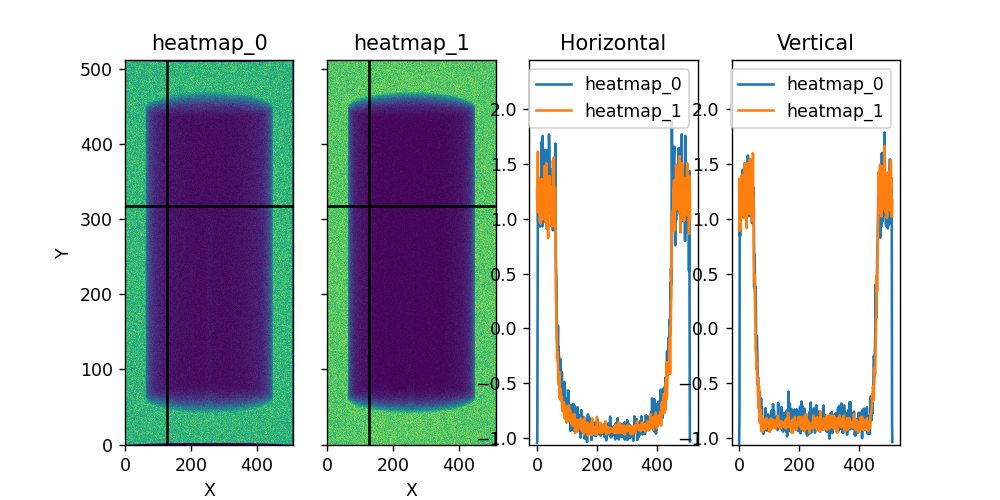

(<Figure size 800x400 with 4 Axes>,
 array([<Axes: title={'center': 'heatmap_0'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'heatmap_1'}, xlabel='X'>,
        <Axes: title={'center': 'Horizontal'}>,
        <Axes: title={'center': 'Vertical'}>], dtype=object))

In [29]:
ggems_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/gate_50000000.0_100keV_edep.mhd') # What is this in? - Should be MeV as well according to didier
ggems_image2, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/ggems_1e08_121kVp_2mmAl_counts.mhd')

# ggems_image2 = ggems_image[0]
ggems_norm = (ggems_image - np.mean(ggems_image))/np.std(ggems_image)
ggems_edep_norm = (ggems_image2 - np.mean(ggems_image2))/np.std(ggems_image2)

pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [ggems_norm,np.rot90(ggems_edep_norm,0)],figsize=[8,4],slices='both')

# print(np.mean((ggems_norm - np.rot90(fastcat_norm,3))**2))

<IPython.core.display.Javascript object>


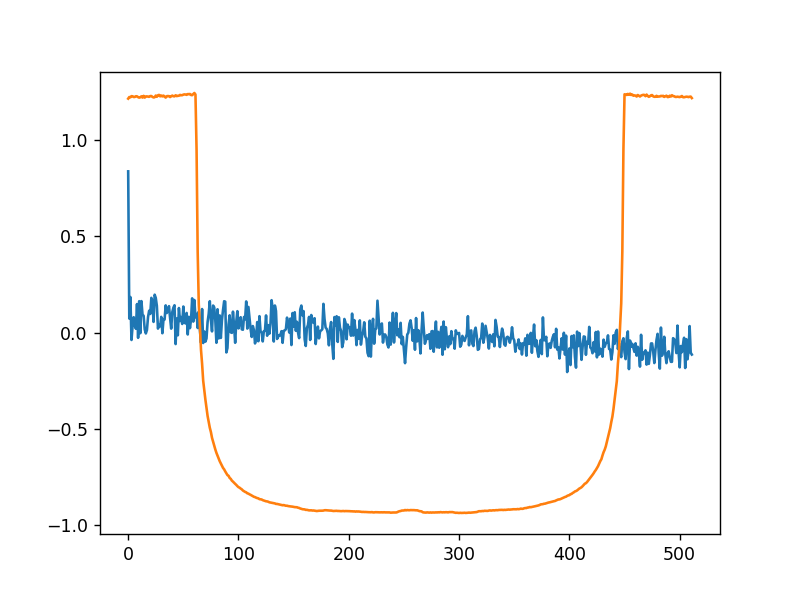

In [20]:
ggems_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/gate_1000000000.0_edep.mhd') # What is this in? - Should be MeV as well according to didier
ggems_image2, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/out/run_120kVp_1e10_hit.mhd')

# ggems_image2 = ggems_image[0]
ggems_norm = (ggems_image - np.mean(ggems_image))/np.std(ggems_image)
ggems_edep_norm = (ggems_image2 - np.mean(ggems_image2))/np.std(ggems_image2)

# pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
#                    [ggems_norm,np.rot90(ggems_edep_norm,0)],figsize=[8,4],slices='both')

plt.figure()
plt.plot(np.mean(ggems_norm[100:-100,:],axis=0))
plt.plot(np.mean(np.flipud(ggems_edep_norm[100:-100,:]),axis=0))

<IPython.core.display.Javascript object>


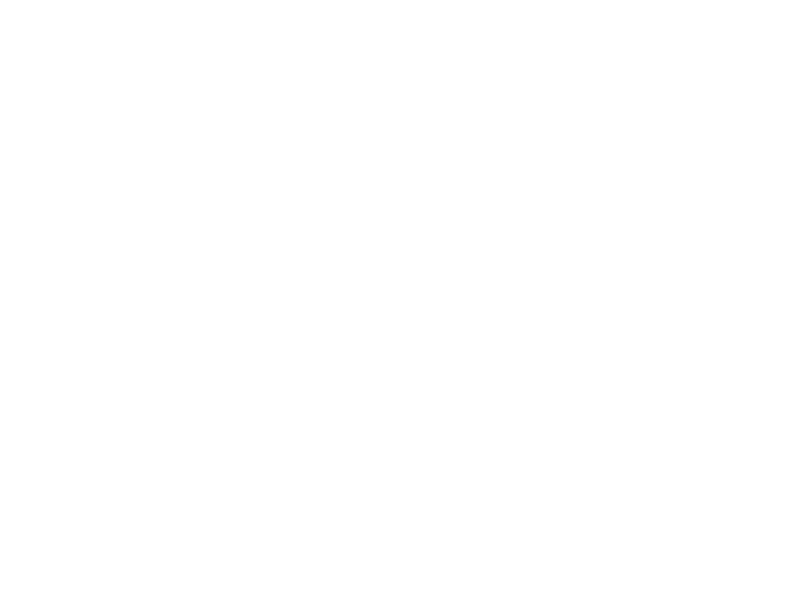

<IPython.core.display.Javascript object>


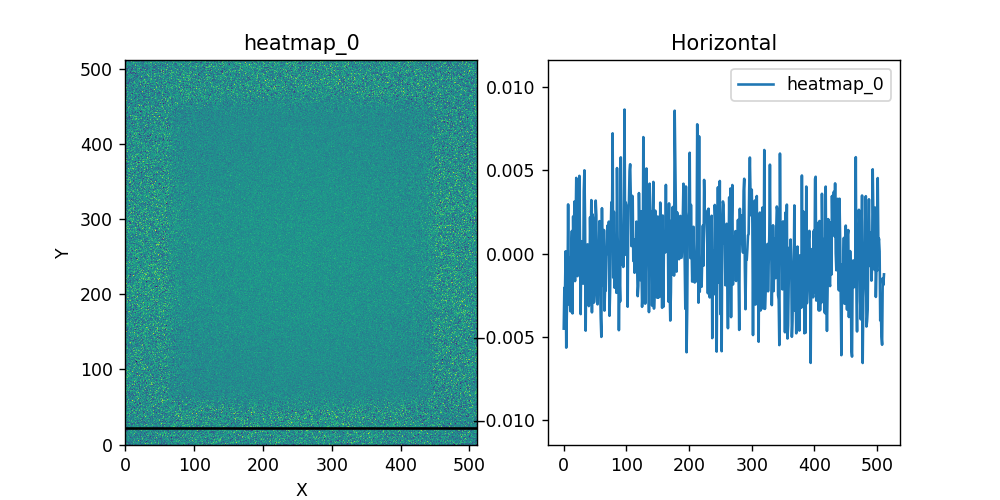

(<Figure size 800x400 with 2 Axes>,
 array([<Axes: title={'center': 'heatmap_0'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'Horizontal'}>], dtype=object))

In [91]:
# plt.figure()
pli.heatmap_slicer(range(ggems_norm.shape[0]),range(ggems_norm.shape[1]),
                   [(ggems_norm - np.rot90(ggems_edep_norm,0))/np.max(ggems_norm)],figsize=[8,4])

<IPython.core.display.Javascript object>


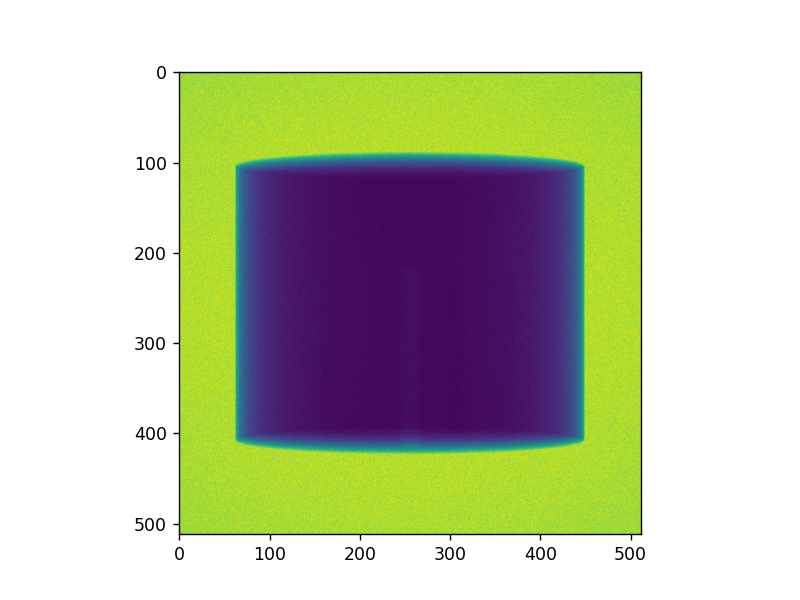

In [58]:
ggems_image, origin, space = load_itk('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/run_edep_hit.mhd') # What is this in? - Should be MeV as well according to didier

plt.figure()
plt.imshow(ggems_image)

In [92]:
import spekpy as sp

In [99]:
spec = np.loadtxt('/home/jericho/1-Workspace/opengate_ggems_comparison/water_cylinder/data/spectrum_120kVp_2mmAl.dat')

<IPython.core.display.Javascript object>


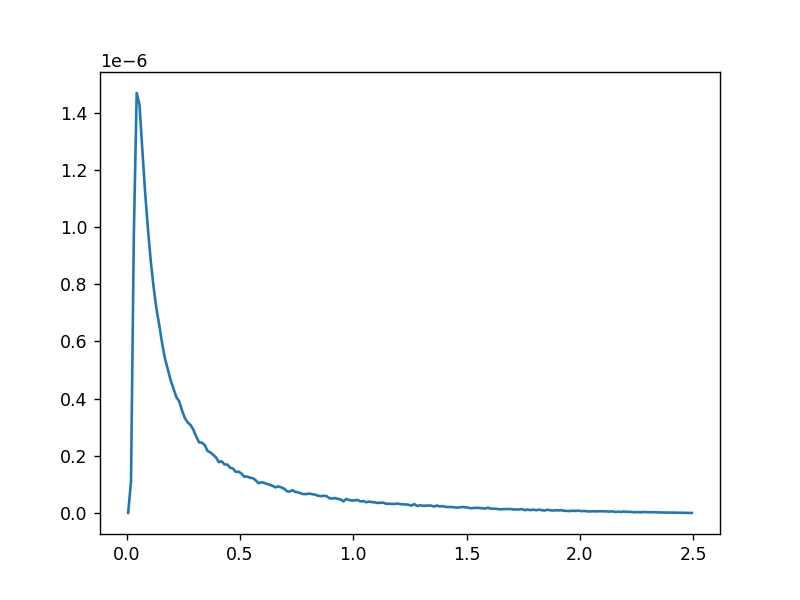

In [103]:
plt.figure()
plt.plot(spec[:,0],spec[:,1])

In [102]:
spec = np.loadtxt('/home/jericho/Software/fastcat/fastcat/data/MV_spectra/Al_spectrum_25.txt')

In [19]:
print(Catphan604_phantom.geomet)

TIGRE parameters
-----
Geometry parameters
Distance from source to detector (DSD) = 1510 mm
Distance from source to origin (DSO)= 1000.0 mm
-----
Detector parameters
Number of pixels (nDetector) = [512 512]
Size of each pixel (dDetector) = [0.784 0.784] mm
Total size of the detector (sDetector) = [401.408 401.408] mm
-----
Image parameters
Number of voxels (nVoxel) = [400 526 526]
Total size of the image (sVoxel) = [200. 263. 263.] mm
Size of each voxel (dVoxel) = [0.5 0.5 0.5] mm
-----
Offset correction parameters
Offset of image from origin (offOrigin) = [0 0 0] mm
Offset of detector (offDetector) = [0 0] mm
-----
Auxillary parameters
Samples per pixel of forward projection (accuracy) = 0.5
-----
Rotation of the Detector (rotDetector) = [0 0 0] rad


In [20]:
Catphan604_phantom.phan_map

array(['Air', 'polyurethane', 'teflon', 'pmp', 'bone50', 'ldpe',
       'polystyrene', 'acrylic', 'bone20', 'pom'], dtype='<U12')